In [154]:
## Train RNN for 1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0

import numpy as np
import sys
import os
import random
import keras


#change the working directory 
os.chdir('/notebooks/torch')

print("This program runs on version 2.0.6")
print("keras version "+keras.__version__)

This program runs on version 2.0.6
keras version 2.0.6


In [155]:
text="1234567890"*10000
targetText=text[1:]

In [156]:
print(targetText[0:10])

2345678901


In [157]:
dct = list(set(text))
max_features = len(dct)

In [158]:
mydict = [(dctElement, counter) for counter, dctElement in enumerate(dct)]
mydict = dict(mydict)
print(mydict)

{'1': 0, '0': 1, '3': 2, '2': 3, '5': 4, '4': 5, '7': 6, '6': 7, '9': 8, '8': 9}


In [159]:
inv_mydict = {v: k for k, v in mydict.iteritems()}

In [160]:
tLen=93
sRow=len(text)%tLen

X=np.zeros( (sRow,tLen,max_features), dtype=int)
y=np.zeros( (sRow,tLen,max_features), dtype=int)
print(X.shape)

(25, 93, 10)


In [161]:
for i in range(sRow) :
    extract=text[i*tLen : i*tLen+tLen]
    extracty=targetText[i*tLen : i*tLen+tLen]
    for j in range(tLen) :
        dexX=dct.index(extract[j])
        dexy=dct.index(extracty[j])
        X[i,j,dexX]=1
        y[i,j,dexy]=1

In [162]:
print(X.shape)
print(X[0,0:5,...])
print(y.shape)
print(y[0,0:5,...])

(25, 93, 10)
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
(25, 93, 10)
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]


In [163]:
print(X.shape)
print(y.shape)

(25, 93, 10)
(25, 93, 10)


In [164]:
# we don't split any. This block is not implemented
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=42)

print(X_train.shape)
print(y_train.shape)


(25, 93, 10)
(25, 93, 10)


In [165]:
# Build the model.
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint

isCheckpoint=False

model = Sequential()
model.add(LSTM(50, input_shape=(None, max_features), return_sequences=True))
#model.add(LSTM(256, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(Dense(max_features))  #is it dense? or add(LSTM(max_features))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')


# It is a best practice to use checkpoint 
callbacks_list=None
if isCheckpoint==True:
  filepath="weight/RNN_BinaryAddition_Method_2-{epoch:02d}-{val_loss:.2f}.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]




In [166]:
all_history=[[],[]]


In [168]:
####
#### Repeat ::: Re-run this block until val_loss reaches a lower value
####

history=model.fit(X_train, y_train, validation_split=0.15 ,batch_size=32, epochs=300,callbacks=callbacks_list)
all_history[0]=all_history[0]+ history.history['loss']
all_history[1]=all_history[1]+ history.history['val_loss']


Train on 21 samples, validate on 4 samples
Epoch 1/300
21/21 [==============================] - 0s - loss: 0.0821 - val_loss: 0.0812
Epoch 2/300
21/21 [==============================] - 0s - loss: 0.0816 - val_loss: 0.0807
Epoch 3/300
21/21 [==============================] - 0s - loss: 0.0811 - val_loss: 0.0802
Epoch 4/300
21/21 [==============================] - 0s - loss: 0.0806 - val_loss: 0.0797
Epoch 5/300
21/21 [==============================] - 0s - loss: 0.0801 - val_loss: 0.0792
Epoch 6/300
21/21 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0787
Epoch 7/300
21/21 [==============================] - 0s - loss: 0.0791 - val_loss: 0.0782
Epoch 8/300
21/21 [==============================] - 0s - loss: 0.0785 - val_loss: 0.0777
Epoch 9/300
21/21 [==============================] - 0s - loss: 0.0780 - val_loss: 0.0772
Epoch 10/300
21/21 [==============================] - 0s - loss: 0.0774 - val_loss: 0.0767
Epoch 11/300
21/21 [==============================] - 0s

21/21 [==============================] - 0s - loss: 0.0382 - val_loss: 0.0394
Epoch 91/300
21/21 [==============================] - 0s - loss: 0.0380 - val_loss: 0.0392
Epoch 92/300
21/21 [==============================] - 0s - loss: 0.0377 - val_loss: 0.0389
Epoch 93/300
21/21 [==============================] - 0s - loss: 0.0375 - val_loss: 0.0387
Epoch 94/300
21/21 [==============================] - 0s - loss: 0.0373 - val_loss: 0.0385
Epoch 95/300
21/21 [==============================] - 0s - loss: 0.0371 - val_loss: 0.0383
Epoch 96/300
21/21 [==============================] - 0s - loss: 0.0369 - val_loss: 0.0381
Epoch 97/300
21/21 [==============================] - 0s - loss: 0.0367 - val_loss: 0.0380
Epoch 98/300
21/21 [==============================] - 0s - loss: 0.0366 - val_loss: 0.0378
Epoch 99/300
21/21 [==============================] - 0s - loss: 0.0364 - val_loss: 0.0376
Epoch 100/300
21/21 [==============================] - 0s - loss: 0.0362 - val_loss: 0.0374
Epoch 101/3

21/21 [==============================] - 0s - loss: 0.0204 - val_loss: 0.0220
Epoch 180/300
21/21 [==============================] - 0s - loss: 0.0201 - val_loss: 0.0218
Epoch 181/300
21/21 [==============================] - 0s - loss: 0.0199 - val_loss: 0.0215
Epoch 182/300
21/21 [==============================] - 1s - loss: 0.0197 - val_loss: 0.0213
Epoch 183/300
21/21 [==============================] - 0s - loss: 0.0194 - val_loss: 0.0211
Epoch 184/300
21/21 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0208
Epoch 185/300
21/21 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0206
Epoch 186/300
21/21 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0204
Epoch 187/300
21/21 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0202
Epoch 188/300
21/21 [==============================] - 0s - loss: 0.0182 - val_loss: 0.0199
Epoch 189/300
21/21 [==============================] - 0s - loss: 0.0180 - val_loss: 0.0197
Ep

21/21 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0078
Epoch 269/300
21/21 [==============================] - 0s - loss: 0.0054 - val_loss: 0.0077
Epoch 270/300
21/21 [==============================] - 0s - loss: 0.0053 - val_loss: 0.0075
Epoch 271/300
21/21 [==============================] - 0s - loss: 0.0052 - val_loss: 0.0074
Epoch 272/300
21/21 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0073
Epoch 273/300
21/21 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0072
Epoch 274/300
21/21 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0071
Epoch 275/300
21/21 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0069
Epoch 276/300
21/21 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0068
Epoch 277/300
21/21 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0067
Epoch 278/300
21/21 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0066
Ep

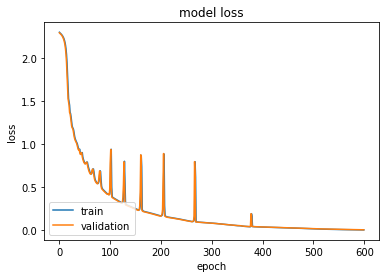

In [169]:
import matplotlib.pyplot as plt
# summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.plot(all_history[0])
plt.plot(all_history[1])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

In [170]:
# score = model.evaluate(X_test, y_test, batch_size=1)
# print("score: "+str(score))


In [171]:
# Test the result

startChar='5'
sentenceLen=50
X_test=np.zeros( (1,sentenceLen,max_features), dtype=int)
dex=dct.index(startChar)
X_test[0,0,dex]=1
print(X_test[0,0:10,...])

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [172]:
for i in range(X_test.shape[1]):
    predict_y=model.predict(X_test)
    predict_y_dex=np.argmax(predict_y[0,i,...])
    if i+1 < X_test.shape[1] :
        X_test[0,i+1,predict_y_dex]=1

In [173]:
print(X_test[0,0:10,...])

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]


In [174]:
sentence = ""
for i in range(X_test.shape[1]):
    tmp=np.where( X_test[0,i,...]==1)
    sentence=sentence+inv_mydict[int(tmp[0])]

In [175]:

print(sentence)

56789012345678901234567890123456789012345678901234
